In [1]:
pip install folium

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 8.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geocoder

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 12.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopandas

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 994 kB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 54.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 26.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap
from bs4 import BeautifulSoup 

print('folium, geopy and geocoder installed')
print('Libraries imported.')

folium, geopy and geocoder installed
Libraries imported.


In [6]:
# get coordinates of Rio de Janeiro
address = 'Rio de Janeiro, Brazil'

geolocator = Nominatim(user_agent="rj_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
sp_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Rio de Janeiro, Brazil are -22.9110137, -43.2093727.


In [7]:
url = "https://en.wikipedia.org/wiki/List_of_Administrative_Regions_in_Rio_de_Janeiro"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

sectorNumberList = []
sectorNeighList = []
sectorPopList = []
sectorPopulationList = []
data = []

for row in soup.find_all("tbody"):
    header = str(row.findAll("th"))
    if "Administrative region" in header:
        i=1
        j=1
        for td in row.find_all("td"):
            if i==1:
                sectorNumberList.append(td.text.replace("\n",""))
            if i==2: 
                sectorPopList.append(td.text.replace("\n",""))
            if i==3: 
                sectorNeighList.append(td.text.replace("\n",""))
            if i==4: 
                sectorPopulationList.append(td.text.replace("\n",""))
            if i==5:
                i=0
            i+=1
            j+=1



df_sector = pd.DataFrame({"Number": sectorNumberList, "Administrative region": sectorPopList, "Neighborhoods": sectorNeighList, "Population": sectorPopulationList})

n_rows=len(df_sector.index)

print("There are {} Administrative regions in Rio de Janeiro".format(n_rows))
df_sector




There are 33 Administrative regions in Rio de Janeiro


,Number,Administrative region,Neighborhoods,Population
0,I,Portuária,"Caju, Gamboa, Santo Cristo, Saúde","48,664"
1,II,Centro,Centro,"41,142"
2,III,Rio Comprido,"Catumbi, Cidade Nova, Estácio, Rio Comprido","78,975"
3,IV,Botafogo,"Botafogo, Catete, Cosme Velho, Flamengo, Glóri...","239,729"
4,V,Copacabana,"Copacabana, Leme","161,191"
5,VI,Lagoa,"Gávea, Ipanema, Jardim Botânico, Lagoa, Leblon...","167,774"
6,VII,São Cristovão,"Benfica, Mangueira, São Cristóvão, Vasco da Gama","84,908"
7,VIII,Tijuca,"Alto da Boa Vista, Praça da Bandeira, Tijuca","181,810"
8,IX,Vila Isabel,"Andaraí, Grajaú, Maracanã, Vila Isabel","189,310"
9,X,Ramos,"Bonsucesso, Manguinhos, Olaria, Ramos","153,177"


In [8]:
a = []
b = []
c = []
for i in range(df_sector.shape[0]):
    x = df_sector.iloc[i, 2].split(", ")
    for z in range(len(x)):
        a.append(x[z]) 
        b.append(df_sector.iloc[i, 1]) 
        c.append(df_sector.iloc[i, 3])
df_neighborhood = pd.DataFrame({"Neighborhood": a, "Administrative region": b, "Population": c})
df_neighborhood

,Neighborhood,Administrative region,Population
0,Caju,Portuária,"48,664"
1,Gamboa,Portuária,"48,664"
2,Santo Cristo,Portuária,"48,664"
3,Saúde,Portuária,"48,664"
4,Centro,Centro,"41,142"
...,...,...,...
155,Jardim Sulacap,Realengo,"243,006"
156,Magalhães Bastos,Realengo,"243,006"
157,Realengo,Realengo,"243,006"
158,Vila Militar,Realengo,"243,006"


In [9]:
geolocator = Nominatim(user_agent="rj_explorer")
location = geolocator.geocode("Ilha do Boqueirão, Rio de Janeiro, Brazil")
latitude = location.latitude
longitude = location.longitude
rj_center = [latitude, longitude]
rj_center

[-22.77299645, -43.158417458379475]

In [10]:
df_neighborhood.iloc[111, 0] = "Ilha do Boqueirão"
print(df_neighborhood.iloc[111, 0])

Ilha do Boqueirão


In [11]:
lat = []
long = []
for index, row in df_neighborhood.iterrows():
    new = ("{}, Rio de Janeiro, Brazil".format(row['Neighborhood']))
    geolocator = Nominatim(user_agent="rj_explorer")
    location = geolocator.geocode(new)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(float("{0:.4f}".format(latitude)))
    long.append(float("{0:.4f}".format(longitude)))
   
# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = lat
df_neighborhood['Longitude'] = long
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Neighborhood,Administrative region,Population,Latitude,Longitude
0,Caju,Portuária,"48,664",-22.8803,-43.2215
1,Gamboa,Portuária,"48,664",-22.8977,-43.1929
2,Santo Cristo,Portuária,"48,664",-22.9008,-43.2034
3,Saúde,Portuária,"48,664",-22.8972,-43.1842
4,Centro,Centro,"41,142",-22.9044,-43.1831


In [12]:
#create map of Rio de Janeiro neighborhoods using latitude and longitude values
map_rio= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, long,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rio)  
    
map_rio

In [13]:
CLIENT_ID = '15O2FMZGLD12STPNKJK21YO1B0L13CSPK52S0BKIGGEH21Q0' # Foursquare ID
CLIENT_SECRET = 'GMPLUOXH5PUL1B3MZXX3SOLIVGYP4Z4HIU0UDZ1Q2U5VVYLO' # Foursquare Secret
ACCESS_TOKEN = 'BCTLVUJOADV5EA4Y4TR4WS44FYVYYMRFAEFFLOE0QCI1LM52' # FourSquare Access Token
VERSION = '20180604'
LIMIT = 100

In [14]:
def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()

There are 349 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Caju,-22.8803,-43.2215,Vila Olímpica Mané Garrincha,536e10ce498e33148de36449,-22.880842,-43.226361,502,Athletics & Sports
1,Caju,-22.8803,-43.2215,Local Do Gol,4d0ced781f6bf04db4657a31,-22.885912,-43.227556,880,Soccer Stadium
2,Caju,-22.8803,-43.2215,Subway,56056630498ee6331dcbd640,-22.886355,-43.224254,730,Sandwich Place
3,Caju,-22.8803,-43.2215,Vila Olímpica do Caju,5135d6e6e4b0b3485627a610,-22.880273,-43.228105,677,Athletics & Sports
4,Caju,-22.8803,-43.2215,Bob's,4e836ba949012cbcd6800e24,-22.886654,-43.225478,816,Burger Joint


In [15]:
print('Top 15 distinct venue counts')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:15]

Top 15 distinct venue counts


,Count
VenueCategory,
Brazilian Restaurant,298
Bar,274
Bakery,194
Gym / Fitness Center,188
Pizza Place,183
Plaza,162
Gym,146
Restaurant,135
Burger Joint,122


In [16]:
restaurant_list =['Restaurant','Burger Joint','BBQ Joint','Seafood Restaurante','Steakhouse','Brazilian Restaurant','Food Truck','Sandwich Place','Snack Place','Fast Food Restaurant']
stk_list = ['Steakhouse']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
stk_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(stk_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(stk_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Steakhouse:', len(stk_restaurants['VenueId'].unique()))
print('Percentage of Steakhouse: {:.2f}%'.format(len(stk_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))

Total number of restaurants: 1463
Total number of Steakhouse: 57
Percentage of Steakhouse: 3.90%


116 neighborhoods do not have any Steakhouse


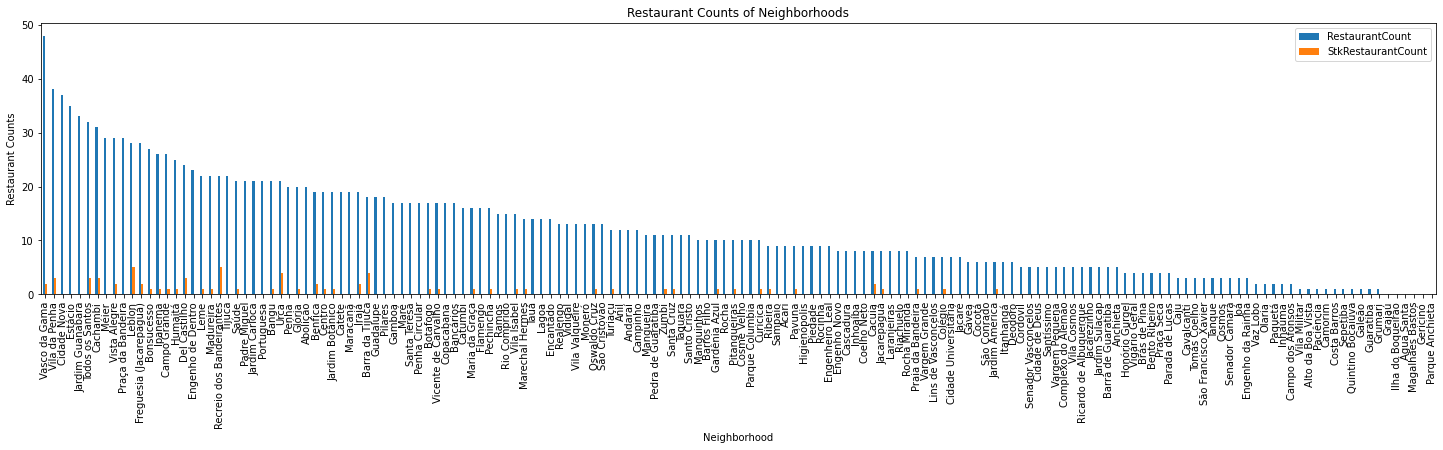

In [17]:

# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": 'RestaurantCount'})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Steakhouse in each Neighborhood
df_stk_rest_counts =  stk_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": 'StkRestaurantCount'})[['StkRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(stk_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_stk_rest_counts = df_stk_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'StkRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_stk_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_stk_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Steakhouse'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','StkRestaurantCount']].plot(kind='bar',figsize=(25,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()

In [18]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_raitings.head(10)

,VenueId,VenueRating,VenueLikes
0,56056630498ee6331dcbd640,7.2,11.0
1,4e836ba949012cbcd6800e24,6.1,16.0
2,537d4dd7498e6816a1ee6e36,NaN,NaN
3,4e7a27cb1f6e07f91807d442,8.0,5.0
4,4beeab95d1b7d13ae218cdec,7.9,329.0
5,4cc1ac7622ce468813053f47,7.2,24.0
6,4c407cb2520fa5931417c8ac,7.0,6.0
7,59a75339d3cce80b91cf107e,7.0,8.0
8,4e45286d922ed454ab37c6d8,7.2,19.0
9,54874340498edde7067df275,6.8,11.0


In [19]:
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_raitings)
neighborhood_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Caju,-22.8803,-43.2215,Subway,56056630498ee6331dcbd640,-22.886355,-43.224254,730,Sandwich Place,7.2,11.0
1,Vasco da Gama,-22.8915,-43.2267,Subway,56056630498ee6331dcbd640,-22.886355,-43.224254,625,Sandwich Place,7.2,11.0
2,Caju,-22.8803,-43.2215,Bob's,4e836ba949012cbcd6800e24,-22.886654,-43.225478,816,Burger Joint,6.1,16.0
3,Vasco da Gama,-22.8915,-43.2267,Bob's,4e836ba949012cbcd6800e24,-22.886654,-43.225478,553,Burger Joint,6.1,16.0
4,Caju,-22.8803,-43.2215,Churrasco do Gaúcho,537d4dd7498e6816a1ee6e36,-22.887194,-43.225053,849,BBQ Joint,NaN,NaN


In [20]:
#merge ratings to SteakHouse restaurants 
stk_restaurants = stk_restaurants.merge(restaurants_raitings)
stk_restaurants.head(5)

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Saúde,-22.8972,-43.1842,Demi-Glace Premium Grill,5715067e498eee1ae0aa8372,-22.904428,-43.178676,983,Steakhouse,8.4,59.0
1,Centro,-22.9044,-43.1831,Demi-Glace Premium Grill,5715067e498eee1ae0aa8372,-22.904428,-43.178676,453,Steakhouse,8.4,59.0
2,Botafogo,-22.9488,-43.1798,Outback Steakhouse,4ba68b15f964a520b75c39e3,-22.954321,-43.177388,662,Steakhouse,NaN,NaN
3,Urca,-22.9541,-43.1680,Outback Steakhouse,4ba68b15f964a520b75c39e3,-22.954321,-43.177388,962,Steakhouse,NaN,NaN
4,Glória,-22.9183,-43.1739,Vamo,572e7fc6498e8539a5b01ffc,-22.914522,-43.166710,848,Steakhouse,NaN,NaN


In [23]:
center = [latitude, longitude]
map_restaurant= folium.Map(location=center, zoom_start=12)
df_neighborhood_nostk = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_rio) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(center).add_to(map_rio)
folium.Circle(center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig, name in zip(stk_restaurants['VenueLatitude'], stk_restaurants['VenueLongitude'], stk_restaurants['Neighborhood'], stk_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)
       
raiting_lt_7 = stk_restaurants[stk_restaurants['VenueRating'] <7]
for lat, lon, neig, name in zip(raiting_lt_7['VenueLatitude'], raiting_lt_7['VenueLongitude'], raiting_lt_7['Neighborhood'], raiting_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

In [25]:
center = [latitude, longitude]
map_restaurant= folium.Map(location=center, zoom_start=12)

df_neighborhood_nostk = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_rio) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(center).add_to(map_rio)
folium.Circle(center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig in zip(df_neighborhood_nostk['Latitude'], df_neighborhood_nostk['Longitude'], df_neighborhood_nostk['Neighborhood']):
    label = folium.Popup(str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='cyan',
        fill=True,
        fill_color='cyan',
        fill_opacity=0.7).add_to(map_restaurant)
map_restaurant

In [26]:
# one hot encoding
onehot = pd.get_dummies(neighborhood_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = neighborhood_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(neighborhood_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue category are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

160  neighborhoods' venue category are shown in 349 columns as below


,Neighborhood,Athletics & Sports,Soccer Stadium,Sandwich Place,Burger Joint,BBQ Joint,Arts & Crafts Store,History Museum,Street Art,Tram Station,...,Cave,Laser Tag,Toll Plaza,Toll Booth,Tailor Shop,Burrito Place,Music Store,Hockey Arena,Rugby Stadium,Hockey Field
0,Abolição,1,0,3,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acari,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alto da Boa Vista,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Anchieta,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andaraí,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# create a new dataframe with most common venue catrgories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()

,Neighborhood,Total Number of Venues,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Abolição,51,Food Truck,BBQ Joint,Bar,Gym,Pizza Place,Sandwich Place,Restaurant,Bakery,Soccer Field,Snack Place
1,Acari,37,Market,Plaza,Pizza Place,Supermarket,Snack Place,Fast Food Restaurant,Bus Stop,Warehouse Store,Restaurant,Gym / Fitness Center
2,Alto da Boa Vista,2,French Restaurant,Mountain,Hockey Field,Pet Store,Vegetarian / Vegan Restaurant,Recording Studio,Shopping Plaza,Train Station,American Restaurant,Lottery Retailer
3,Anchieta,21,Fast Food Restaurant,Plaza,Gym / Fitness Center,Supermarket,Fruit & Vegetable Store,Snack Place,Pizza Place,Nightclub,Border Crossing,Gymnastics Gym
4,Andaraí,67,Bar,Bakery,Gym / Fitness Center,Food Truck,Pizza Place,Brazilian Restaurant,Japanese Restaurant,Fruit & Vegetable Store,Music Venue,Pharmacy


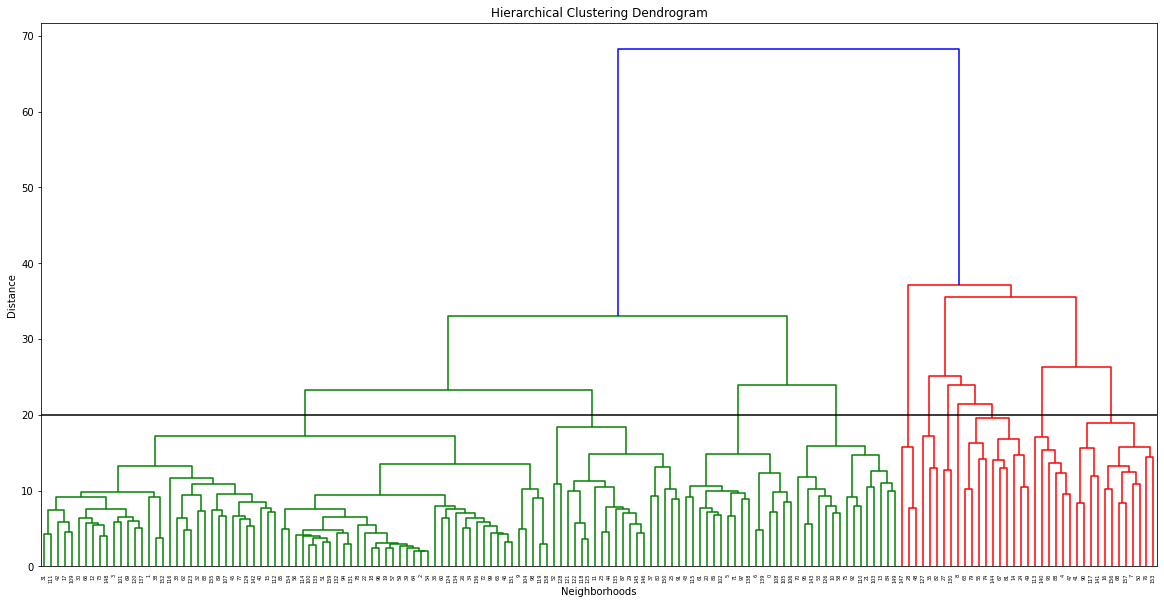

In [29]:
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(20, 10))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [30]:
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_neighborhood.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant']])
venues_cluster.head()

,Neighborhood,Administrative region,Population,Latitude,Longitude,NeighborhoodCluster,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant
0,Caju,Portuária,"48,664",-22.8803,-43.2215,4,Athletics & Sports,Soccer Stadium,Sandwich Place
1,Gamboa,Portuária,"48,664",-22.8977,-43.1929,4,Brazilian Restaurant,Nightclub,Factory
2,Santo Cristo,Portuária,"48,664",-22.9008,-43.2034,4,Factory,Brazilian Restaurant,Hotel
3,Saúde,Portuária,"48,664",-22.8972,-43.1842,0,Brazilian Restaurant,Nightclub,Music Venue
4,Centro,Centro,"41,142",-22.9044,-43.1831,0,Bookstore,Coffee Shop,Music Venue


In [38]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster, sector, SectorPopulation  in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['Neighborhood'], venues_cluster['NeighborhoodCluster'], venues_cluster['Administrative region'],venues_cluster['Population']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster)+ ' ' + str(sector) + ' ' + str(SectorPopulation), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(center).add_to(map_clusters)
folium.Circle(center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

In [39]:
print(venues_cluster.groupby(['NeighborhoodCluster','1st Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))

venues_cluster.groupby(['NeighborhoodCluster','2nd Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

                                                Neighborhood Count
NeighborhoodCluster 1st Most Common Restaurant                    
0                   Bar                                          5
                    Bookstore                                    1
                    Brazilian Restaurant                         3
                    Hostel                                       2
                    Hotel                                        3
...                                                            ...
4                   Seafood Restaurant                           2
                    Shopping Mall                                1
                    Snack Place                                  3
                    Stables                                      1
5                   Brazilian Restaurant                         3

[61 rows x 1 columns]


Neighborhood Count
NeighborhoodCluster 2nd Most Common Restaurant                           
0                   Bar                                                 2
                    Bookstore                                           1
                    Brazilian Restaurant                                3
                    Coffee Shop                                         3
                    Gym / Fitness Center                                2
...                                                                   ...
4                   Sushi Restaurant                                    1
                    Train Station                                       1
                    Wine Bar                                            1
5                   Northeastern Brazilian Restaurant                   1
                    Restaurant                                          2

[88 rows x 1 columns]